#### Imports

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('data/cinema_data.xlsx')

print(data)

   Year  Count
0  2009   2961
1  2010   6968
2  2011  10073
3  2012  11639
4  2013  13136
5  2014  13158
6  2015  13985
7  2016  14278
8  2017  15499
9  2018  14543


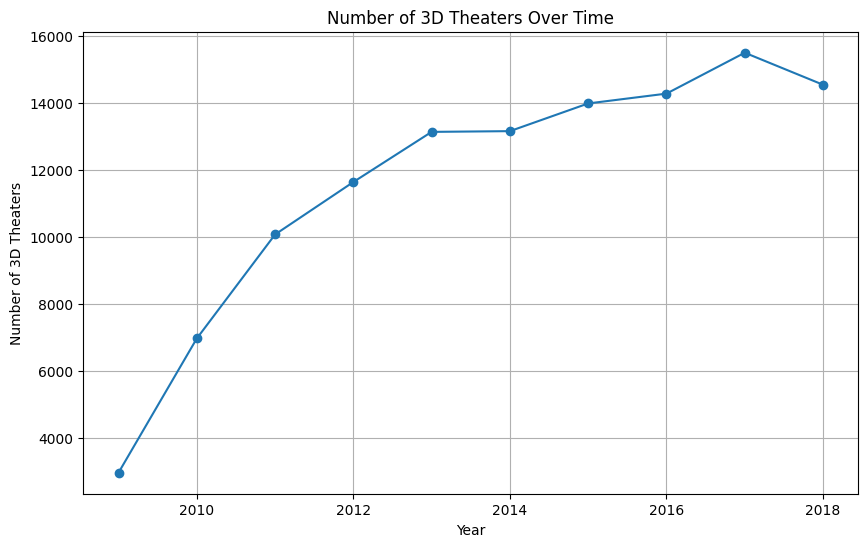

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Count'], marker='o')
plt.title('Number of 3D Theaters Over Time')
plt.xlabel('Year')
plt.ylabel('Number of 3D Theaters')
plt.grid(True)
plt.show()

In [4]:
def bass_model(t, p, q, M):
    """Bass Diffusion Model"""
    return (M * (p + q) ** 2 * np.exp(-(p + q) * t)) / (p + q * np.exp(-(p + q) * t)) ** 2


In [5]:
data['Year'] -= data['Year'].min()  # Normalize years to start from 0

In [6]:
params, _ = opt.curve_fit(bass_model, data['Year'], data['Count'], p0=[0.03, 0.38, 16000])
p, q, M = params
print(f"Estimated Parameters: p={p:.4f}, q={q:.4f}, M={M:.2f}")


Estimated Parameters: p=0.0310, q=0.2783, M=5512.29


In [7]:
years_future = np.arange(0, 15)
predicted = bass_model(years_future, p, q, M)

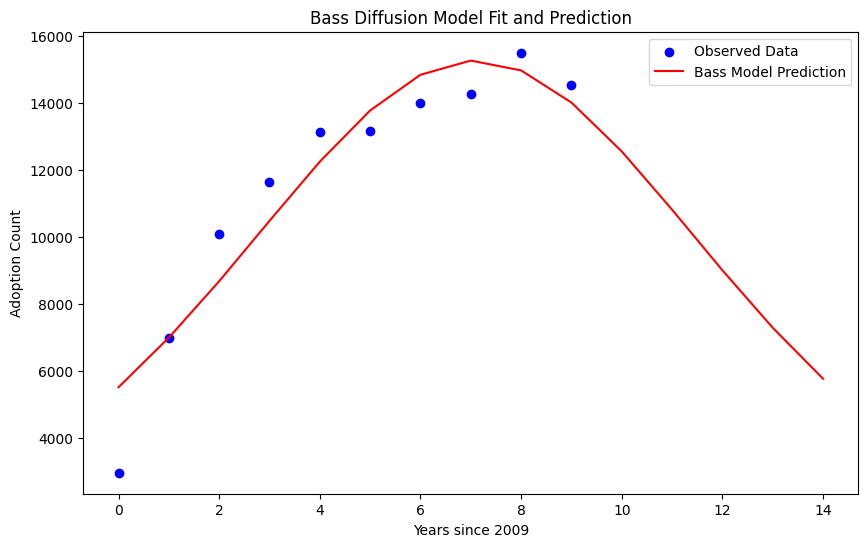

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Year'], data['Count'], label='Observed Data', color='blue')
plt.plot(years_future, predicted, label='Bass Model Prediction', color='red')
plt.xlabel('Years since 2009')
plt.ylabel('Adoption Count')
plt.legend()
plt.title('Bass Diffusion Model Fit and Prediction')
plt.show()
